In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#df = pd.read_csv("./data/north.csv")
df = pd.read_pickle("./data/all")

In [7]:
df.head()

,Datetime,DMA,Date,Time,Flow,Flow Validity Code,Area,Number Of Household Properties,Number Of Non-Household Properties
0,2016-01-04 00:00:00,5,01/04/2016,00:00:00,2.667,V,E1,243,47
1,2016-01-04 00:15:00,5,01/04/2016,00:15:00,2.678,V,E1,243,47
2,2016-01-04 00:30:00,5,01/04/2016,00:30:00,2.689,V,E1,243,47
3,2016-01-04 00:45:00,5,01/04/2016,00:45:00,2.656,V,E1,243,47
4,2016-01-04 01:00:00,5,01/04/2016,01:00:00,2.722,V,E1,243,47


In [4]:
df['DMA'].unique()

array([   5,   40,   50, ..., 2428, 2429, 2430], dtype=int64)

In [8]:
#dma = df = df[(df['DMA'] == 414)]
dma = df.drop(['Area', 'DMA', 'Flow Validity Code','Number Of Household Properties', 'Number Of Non-Household Properties'], axis=1)
dma.isnull().sum()

Datetime         0
Date             0
Time             0
Flow        991591
dtype: int64

In [9]:
len(dma.index)

75593747

In [10]:
dma['Datetime'] = pd.to_datetime(dma['Datetime'])
dma['hour'] = dma['Datetime'].dt.hour
dma['day_of_week'] = dma['Datetime'].dt.dayofweek
dma = dma.set_index('Datetime')

In [13]:
dma['intervalMean'] = dma.groupby([dma.day_of_week, dma.Time])['Flow'].transform(np.mean)

In [12]:
#dma.to_pickle("./data/DMAProcessed")
empt = dma[dma.isnull().any(axis=1)]
empt.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,
2016-11-18 09:45:00,18/11/2016,09:45:00,NaN,9,4,7.285920
2016-11-18 10:00:00,18/11/2016,10:00:00,NaN,10,4,7.192725
2016-07-12 12:30:00,07/12/2016,12:30:00,NaN,12,1,6.403134
2017-03-26 01:00:00,26/03/2017,01:00:00,NaN,1,6,2.861662
2017-03-26 01:15:00,26/03/2017,01:15:00,NaN,1,6,2.785588


In [14]:
dma.Flow.fillna(dma.intervalMean, inplace=True)
empt = dma[dma.isnull().any(axis=1)]
empt.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,


In [15]:
totalPlot = dma[['Flow', 'intervalMean', 'day_of_week']]

In [16]:
totalPlot.plot()
#09/08/2016
#30/08/2016
#20/12/2016
#03/01/2017

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001FC03075510> (for post_execute):


ValueError: object too deep for desired array

MemoryError: 

In [368]:
day1 = totalPlot[:96]
day2 = totalPlot[96:192]
day3 = totalPlot[192:288]

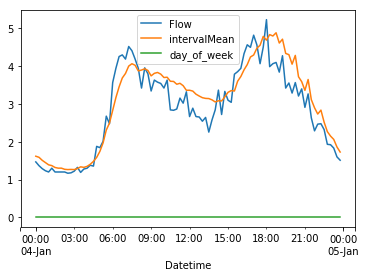

In [369]:
day1.plot()

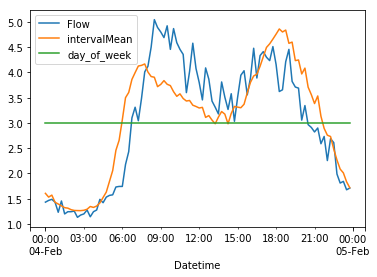

In [370]:
day2.plot()

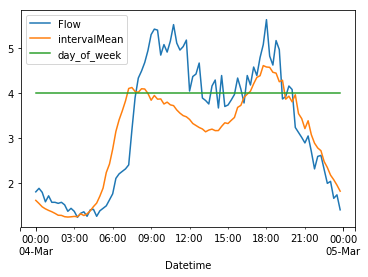

In [371]:
day3.plot()

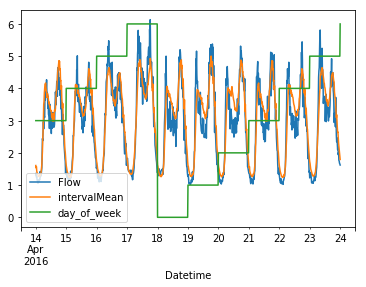

In [372]:
normal10Days = totalPlot['2016-04-14 00:00:00':'2016-04-24 00:00:00']
normal10Days.plot()

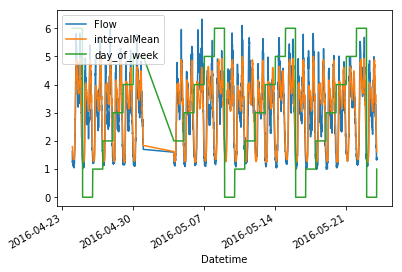

In [373]:
normalMonth = totalPlot['2016-04-24 00:00:00':'2016-05-24 00:00:00']
normalMonth.plot()

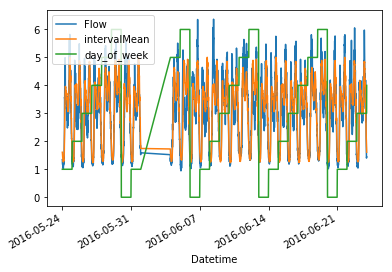

In [374]:
normalMonth = totalPlot['2016-05-24 00:00:00':'2016-06-24 00:00:00']
normalMonth.plot()

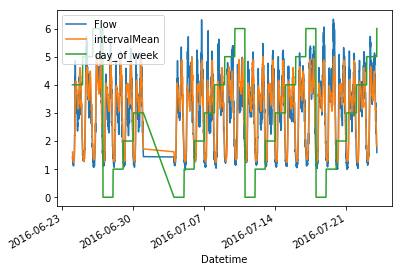

In [375]:
normalMonth = totalPlot['2016-06-24 00:00:00':'2016-07-24 00:00:00']
normalMonth.plot()

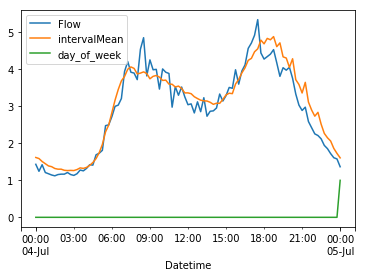

In [376]:
normalMonth = totalPlot['2016-07-01 00:00:00':'2016-07-05 00:00:00']
normalMonth.plot()

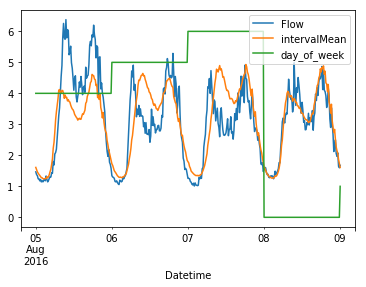

In [377]:
# Repairs
#96 steps per day
#09/08/2016
#30/08/2016
#20/12/2016
#03/01/2017

firstRepair = totalPlot['2016-08-05 00:00:00' : '2016-08-09 00:00:00']
firstRepair.plot()

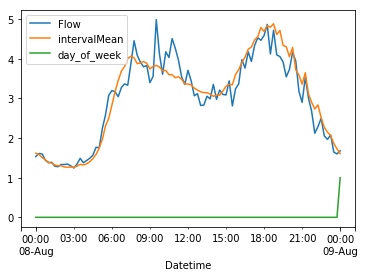

In [378]:
DayBeforefirstRepair = totalPlot['2016-08-08 00:00:00' : '2016-08-09 00:00:00']
DayBeforefirstRepair.plot()

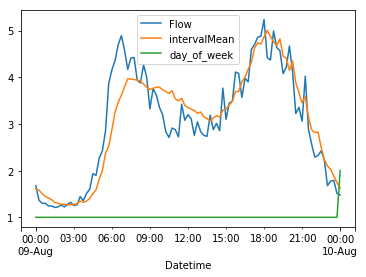

In [379]:
DayAfterfirstRepair = totalPlot['2016-08-09 00:00:00' : '2016-08-10 00:00:00']
DayAfterfirstRepair.plot()

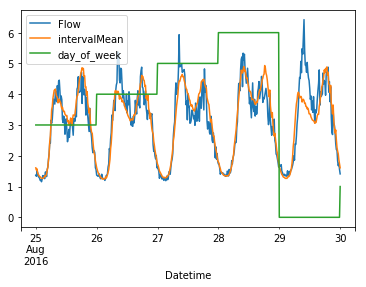

In [380]:
secondRepair = totalPlot['2016-08-25 00:00:00' : '2016-08-30 00:00:00']
secondRepair.plot()

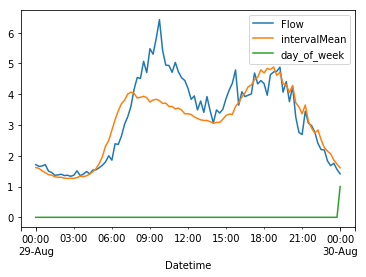

In [381]:
dayBeforeSecondRepair = totalPlot['2016-08-29 00:00:00' : '2016-08-30 00:00:00']
dayBeforeSecondRepair.plot()

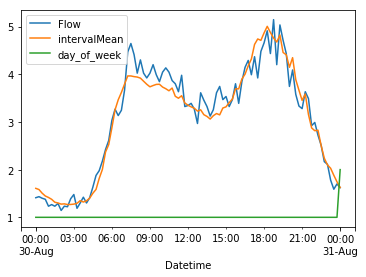

In [382]:
dayAfterSecondRepair = totalPlot['2016-08-30 00:00:00' : '2016-08-31 00:00:00']
dayAfterSecondRepair.plot()

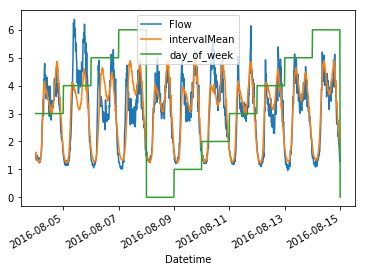

In [383]:
august1 = totalPlot['2016-08-01 00:00:00' : '2016-08-15 00:00:00']
august1.plot()

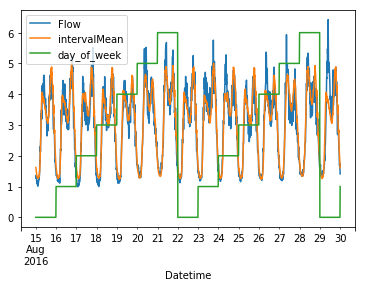

In [384]:
august2 = totalPlot['2016-08-15 00:00:00' : '2016-08-30 00:00:00']
august2.plot()

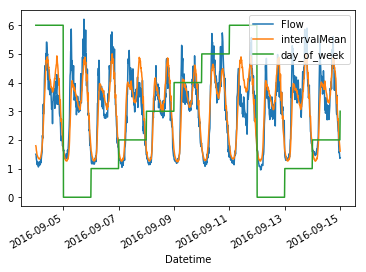

In [385]:
sept1 = totalPlot['2016-09-01 00:00:00' : '2016-09-15 00:00:00']
sept1.plot()

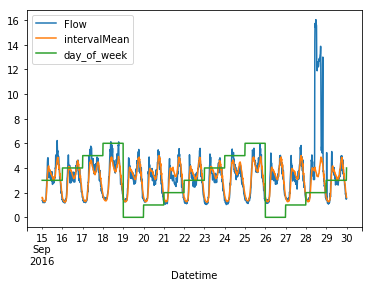

In [386]:
sept2 = totalPlot['2016-09-15 00:00:00' : '2016-09-30 00:00:00']
sept2.plot()

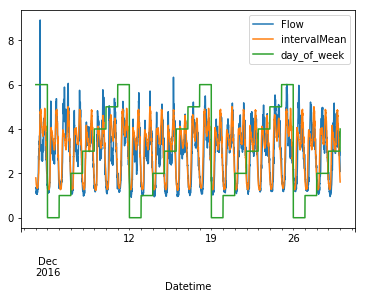

In [387]:
Dec1 = totalPlot['2016-12-01 00:00:00' : '2016-12-30 00:00:00']
Dec1.plot()

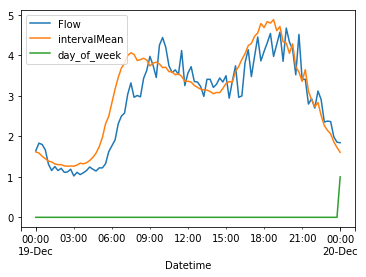

In [388]:
DaybeforeDecRepair = totalPlot['2016-12-19 00:00:00' : '2016-12-20 00:00:00']
DaybeforeDecRepair.plot()

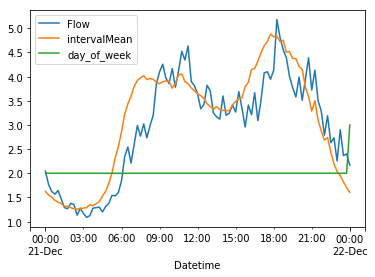

In [389]:
DayAfterDecRepair = totalPlot['2016-12-21 00:00:00' : '2016-12-22 00:00:00']
DayAfterDecRepair.plot()

In [17]:
dma.to_pickle("./readyToGo")

MemoryError: 

In [391]:
dma.head()

,Date,Time,Flow,hour,day_of_week,intervalMean
Datetime,,,,,,
2016-01-04 00:00:00,01/04/2016,00:00:00,1.467,0,0,1.617722
2016-01-04 00:15:00,01/04/2016,00:15:00,1.367,0,0,1.588889
2016-01-04 00:30:00,01/04/2016,00:30:00,1.289,0,0,1.509315
2016-01-04 00:45:00,01/04/2016,00:45:00,1.233,0,0,1.449370
2016-01-04 01:00:00,01/04/2016,01:00:00,1.200,1,0,1.389463


In [408]:
baseline = dma[dma['hour'] == 3]
baseline = baseline['2017-01-15 00:00:00' : '2017-03-15 00:00:00']
baseline = baseline[['Flow', 'intervalMean']]
# Repairs for DMA 838
#96 steps per day
#09/08/2016
#30/08/2016
#20/12/2016
#03/01/2017

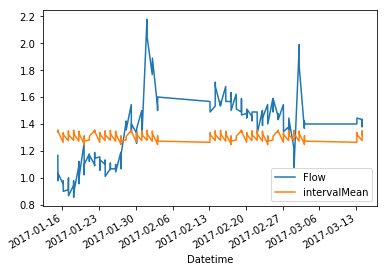

In [409]:
baseline.plot()

In [ ]:
#19/06/2016
#19/06/2016
#06/12/2016
#02/01/2017
#10/02/2017
#27/03/2017
#repairs for DMA 414
